# Text Mining - project 1
##### Authors: Antoni Perużyński, Karolina Tatarczyk 

In [ ]:
#!pip install -U nltk
#!pip install tabulate

In [ ]:
#pip install tensorflow

In [ ]:
#pip install seaborn

In [ ]:
#pip install seaborn --upgrade

## Imports

In [1]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
#from services import stemming, stop_word, txt_cleaning
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
#from services.text_tokenizer import text_tokenizer
#from services.text_tokenizer import text_tokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn import metrics, __all__
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

#from functions import True_without_Fake, Fake_without_True, TF_IDF, Binary_weight
#from services.text_tokenizer import text_tokenizer
#from services.vectorizing import vectorizing, vectorizing_voc

import tensorflow as tf

from wordcloud import WordCloud

import sklearn as sk
from sklearn.neural_network import MLPClassifier

from PIL import Image

## Text cleaning

### Bag of words

Creating function making $Bag~of~words$ to make map of words.

In [2]:
def create_bow(text: list) -> list:
    word2count = {}
    for word in text:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
    return word2count

# Preparing for data cleaning

We created the following functions to clear data:
    <li>stopwords_function() - to clear data from stopwords</li>
    <li>stemming_function() - to stem data </li>
    <li>clean_text() - to clean data from emoticons, numbers, html links, whitespaces and lowering letters</li>
    <li>text_tokenizer() - recall all previous functions and deleting words with lenght lower than 3 </li>

### Stop words

In [3]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    #word_token = word_tokenize(text)
    cleaned = [w for w in text if w not in stop_words]
    return " ".join(cleaned)

### Stemming

In [4]:
def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

### Text cleaning

In [5]:
def clean_text(txt: str) -> str:
    find_emoticons = re.findall(r"[:;][-]?[/\|\)\(><D]", txt)
    txt_low = txt.lower()
    delete_numbers = re.sub("[0-9]+", "", txt_low)
    delete_html = re.sub(r'<.*?>', '', delete_numbers)
    delete_punctuation = re.sub(r"[^\w\s]", " ", delete_html)
    delete_whitespace = delete_punctuation.strip()
    clean_txt = delete_whitespace + ' '.join(find_emoticons)
    return clean_txt

### Text tokenizer

In [6]:
def text_tokenizer(text: str):

    cleaned_text = clean_text(text)
    tokens = word_tokenize(cleaned_text)
    without_stopwords =stopwords_function(tokens)
    stemmed_text = stemming_function(without_stopwords)

    return [w for w in stemmed_text if len(w) > 3]

# Vectorizing

Function $vectorizing\_voc()$ is taking one more argument (vocabulary) to vectorize dataset.

In [7]:
def vectorizing(sample):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

def vectorizing_voc(sample, vocabulary):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer, vocabulary=vocabulary)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

### Top10 setA minus setB

Function used to take top 10 tokens which appear only in first set.

In [8]:
def Top10onlyInA(sample_A, sample_B, tit, jpg_name):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)

    X_transform_sample_true = vectorizer1.fit_transform(sample_A)
    titles_A = (vectorizer1.get_feature_names())

    X_transform_sample_fake = vectorizer1.fit_transform(sample_B)
    titles_B = (vectorizer1.get_feature_names())

    AwithoutB = [x for x in titles_A if x not in titles_B]

    vectorizer = CountVectorizer(tokenizer=text_tokenizer, vocabulary=AwithoutB)
    X_transform_sample = vectorizer.fit_transform(sample_A)

    titles = (vectorizer.get_feature_names())  # Get all tokens
    array = X_transform_sample.toarray() # Table [1,0,0....] is token in document

    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  # quantity of token in all documents
    max_val_col = np.argpartition(column_sum, -10)[-10:]  # Indexes of top 10 tokens
    top_10_quantity = column_sum[max_val_col]  # Quantity of top 10 tokens
    #top_10_tokens = titles[max_val_col]
    #print(top_10_tokens)
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
    
    # Bar plot

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity',color='#833864', title=tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    plt.show()

    print(tabulate(df_1, headers='keys', tablefmt='psql'))  # Pretty table

    return

### Top10_OneSet

Function used to take top 10 tokens in set.

In [9]:
def Top10_OneSet(sample, tit, jpg_name):
  
    vectorizer = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer.fit_transform(sample)

    titles = (vectorizer.get_feature_names())  # Get all tokens
    array = X_transform_sample.toarray()

    """
    Display top 10 tokens
    """
    print("Display top 10 tokens")
    column_sum = np.sum(array, axis=0)  # Sum by column existance of token in row
    max_val_col = np.argpartition(column_sum, -10)[-10:]  # Indexes of top 10 tokens
    top_10_quantity = column_sum[max_val_col]  # Quantity of top 10 tokens
    
    #top_10_tokens = titles[max_val_col]
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])
 
    print(top_10_tokens)

    # Bar plot of quantity top 10 tokens in true news

    df_1 = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df_1 = df_1.sort_values(by="quantity")
    plot = df_1.plot(kind='barh', x='titles', y='quantity', color='#833864',
                     title=tit)
    fig = plot.get_figure()
    #fig.savefig(jpg_name+'.png')
    plt.show()

    print(tabulate(df_1, headers='keys', tablefmt='psql'))  # Pretty table

    return

### TF_IDF

In [10]:
def TF_IDF(sample):
    vectorizer_tf = TfidfVectorizer(tokenizer=text_tokenizer)
    X_transform_sample_tf = vectorizer_tf.fit_transform(sample)
    titles = (vectorizer_tf.get_feature_names())
    array_tf = X_transform_sample_tf.toarray()

    # Display top 10 most important tokens

    print("Display top 10 most important tokens")
    tf_col_sum = np.mean(array_tf, axis=0)
    max_tf_val_col = np.argpartition(tf_col_sum, -10)[-10:]
    top_10_tf_quantity = tf_col_sum[max_tf_val_col]
    #top_10_tf_tokens = titles[max_tf_val_col]
    
    top_10_tf_tokens = []
    for i in max_tf_val_col:
        top_10_tf_tokens.append(titles[i])
 
    print(top_10_tf_tokens)

    # ''' Bar plot of TF-IDF indexes top 10 most important tokens in true news'''

    df_2 = pd.DataFrame({'titles': top_10_tf_tokens, 'TFIDF': top_10_tf_quantity})
    df_2 = df_2.sort_values(by="TFIDF")
    plot2 = df_2.plot(kind='barh', x='titles', y='TFIDF', color='#c2619b' ,title="Crucial tokens based on TF-IDF")
    fig2 = plot2.get_figure()
    #fig2.savefig('TF_IDF.png')
    plt.show()
    print(tabulate(df_2, headers='keys', tablefmt='psql'))  # Pretty table

    return

### Binary weight

In [11]:
def Binary_weight(sample):
    vectorizer = CountVectorizer(tokenizer=text_tokenizer, binary=True)
    X_transform_sample = vectorizer.fit_transform(sample)
    titles = (vectorizer.get_feature_names())
    array = X_transform_sample.toarray()

    column_sum = np.sum(array, axis=0)
    max_val_col = np.argpartition(column_sum, -10)[-10:]
    top_10_quantity = column_sum[max_val_col]
    #top_10_tokens = titles[np.argpartition(column_sum, -10)[-10:]]
    
    top_10_tokens = []
    for i in max_val_col:
        top_10_tokens.append(titles[i])

    print(top_10_tokens)
    

    df = pd.DataFrame({'titles': top_10_tokens, 'quantity': top_10_quantity})
    df = df.sort_values(by="quantity")
    plot = df.plot(kind='barh', x='titles', y='quantity',color='#bc5090', title="Crucial tokens based on binary weight")
    fig = plot.get_figure()
    #fig.savefig('Binary_weight.png')
    plt.show()

    print(tabulate(df, headers='keys', tablefmt='psql'))

    return

# Data loading

 Dataset chosen for project contains information about movies. Dataset provides details about title, description and rate about each movie. After deleting rows with null values dataset has 3025 observations. For analysis purposes we only use three following columns:
 
<li>description - description about movie,</li>
<li>tmdb_score - average score about movie.</li>
<li>Best - additional column created for classification dividing our dataset to "best" and "worst" movies depending on score gave by users. "best" if score $>$ 6, "worst" if score $\leq$ 6</li>

In [12]:
#import pandas as pd

dataset_titles = pd.read_csv('titles.csv', usecols=['description', 'tmdb_score'])
#print(dataset_titles)

sample=dataset_titles['description']
dataset_titles['Best']=dataset_titles['tmdb_score']>=7
dataset_titles

,description,tmdb_score,Best
0,Young Dorothy finds herself in a magical world...,7.6,True
1,"Newspaper magnate, Charles Foster Kane is take...",8.0,True
2,"In Casablanca, Morocco in December 1941, a cyn...",8.2,True
3,Private Investigator Philip Marlowe is hired b...,7.7,True
4,A private detective takes on a case that invol...,7.8,True
...,...,...,...
3289,In this Concert he focuses on the star and mos...,8.1,True
3290,Romantic comedy...coming soon.,2.0,False
3291,A stand-up comedy special featuring Shari Diaz...,NaN,False
3292,Comedy special starring winners of the second ...,NaN,False


In the next step we deleted data with $null$ values in column tmdb_score and rounded, converted values from $double$ to $int$.

In [13]:
dataset_titles = dataset_titles.dropna()
dataset_titles.tmdb_score = dataset_titles.tmdb_score.astype(int)
#print(dataset_titles)
sample = dataset_titles['description']
dataset_titles

C:\Users\Karolina\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,description,tmdb_score,Best
0,Young Dorothy finds herself in a magical world...,7,True
1,"Newspaper magnate, Charles Foster Kane is take...",8,True
2,"In Casablanca, Morocco in December 1941, a cyn...",8,True
3,Private Investigator Philip Marlowe is hired b...,7,True
4,A private detective takes on a case that invol...,7,True
...,...,...,...
3283,Marlon explores his greatest fears onstage whi...,5,False
3284,British comedian Ahir Shah mixes philosophical...,7,True
3289,In this Concert he focuses on the star and mos...,8,True
3290,Romantic comedy...coming soon.,2,False


# Plot and pretty table representing 10 of the most important tokens in descriptions (after text cleaning)

In the below plot we see that movies in our dataset are mainly about $life$ , $world$, $family$, $love$.

Display top 10 tokens
['love', 'take', 'stori', 'young', 'find', 'world', 'famili', 'year', 'life', 'live']


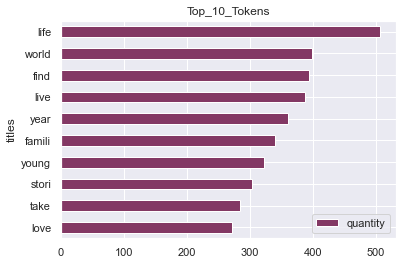

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  0 | love     |        272 |
|  1 | take     |        284 |
|  2 | stori    |        304 |
|  3 | young    |        323 |
|  6 | famili   |        340 |
|  7 | year     |        361 |
|  9 | live     |        387 |
|  4 | find     |        394 |
|  5 | world    |        398 |
|  8 | life     |        506 |
+----+----------+------------+


In [14]:
Top10_OneSet(sample,"Top_10_Tokens","Top_10_Tokens")

['love', 'take', 'stori', 'life', 'world', 'live', 'find', 'young', 'famili', 'year']


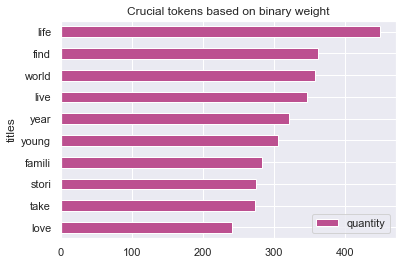

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  0 | love     |        241 |
|  1 | take     |        273 |
|  2 | stori    |        275 |
|  8 | famili   |        283 |
|  7 | young    |        306 |
|  9 | year     |        322 |
|  5 | live     |        347 |
|  4 | world    |        358 |
|  6 | find     |        362 |
|  3 | life     |        449 |
+----+----------+------------+


In [15]:
Binary_weight(sample)

Display top 10 most important tokens
['take', 'stori', 'love', 'young', 'famili', 'world', 'live', 'year', 'life', 'find']


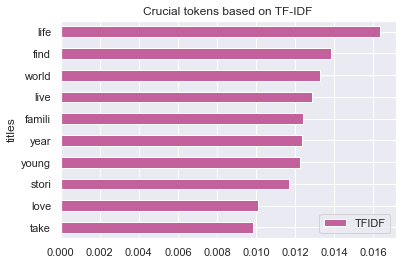

+----+----------+------------+
|    | titles   |      TFIDF |
|----+----------+------------|
|  0 | take     | 0.00983186 |
|  2 | love     | 0.0101086  |
|  1 | stori    | 0.011692   |
|  3 | young    | 0.0122321  |
|  7 | year     | 0.0123759  |
|  4 | famili   | 0.0123969  |
|  6 | live     | 0.0128783  |
|  5 | world    | 0.0132935  |
|  9 | find     | 0.0138198  |
|  8 | life     | 0.0163315  |
+----+----------+------------+


In [16]:
TF_IDF(sample)

# Data exploration

Distribution of movies depending on scores. 

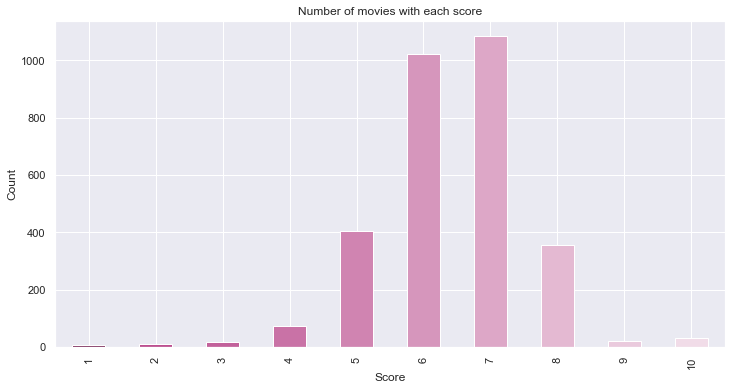

In [17]:
plt.figure(figsize=(12,6))
plt.title("Number of movies with each score")
colors = ['#833864','#bc5090','#c2619b','#c972a6','#d084b1','#d696bc','#dda7c7','#e4b9d2','#eacadd','#f1dce8']

dataset_titles['tmdb_score'].value_counts().sort_index().plot.bar(color=colors)
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

## Extraction of movies with rates greater than 6

In [18]:
dataset_best = dataset_titles.loc[(dataset_titles['tmdb_score'] > 6)]
print(dataset_best.head())
sample_best = dataset_best['description']

                                         description  tmdb_score  Best
0  Young Dorothy finds herself in a magical world...           7  True
1  Newspaper magnate, Charles Foster Kane is take...           8  True
2  In Casablanca, Morocco in December 1941, a cyn...           8  True
3  Private Investigator Philip Marlowe is hired b...           7  True
4  A private detective takes on a case that invol...           7  True


## Visualization of top 10 tokens in best movies

Display top 10 tokens
['take', 'famili', 'young', 'world', 'live', 'find', 'year', 'life', 'seri', 'stori']


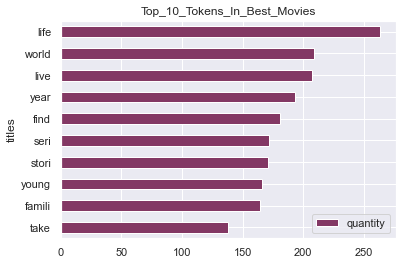

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  0 | take     |        138 |
|  1 | famili   |        164 |
|  2 | young    |        166 |
|  9 | stori    |        171 |
|  8 | seri     |        172 |
|  5 | find     |        181 |
|  6 | year     |        193 |
|  4 | live     |        207 |
|  3 | world    |        209 |
|  7 | life     |        263 |
+----+----------+------------+
['seri', 'famili', 'take', 'stori', 'live', 'find', 'life', 'young', 'world', 'year']


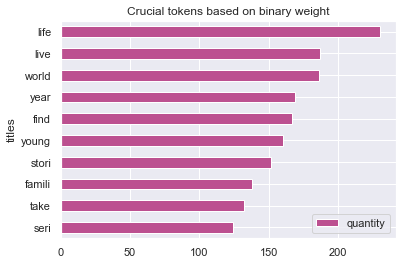

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  0 | seri     |        124 |
|  2 | take     |        132 |
|  1 | famili   |        138 |
|  3 | stori    |        152 |
|  7 | young    |        160 |
|  5 | find     |        167 |
|  9 | year     |        169 |
|  8 | world    |        186 |
|  4 | live     |        187 |
|  6 | life     |        230 |
+----+----------+------------+
Display top 10 most important tokens
['friend', 'seri', 'young', 'famili', 'stori', 'find', 'live', 'year', 'life', 'world']


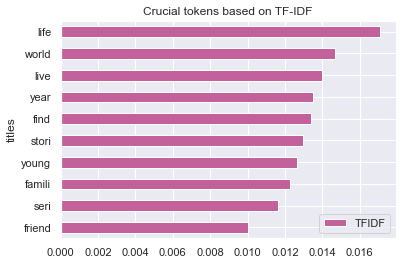

+----+----------+-----------+
|    | titles   |     TFIDF |
|----+----------+-----------|
|  0 | friend   | 0.0100237 |
|  1 | seri     | 0.0116352 |
|  3 | famili   | 0.0122817 |
|  2 | young    | 0.0126566 |
|  4 | stori    | 0.0129869 |
|  5 | find     | 0.01339   |
|  7 | year     | 0.0134916 |
|  6 | live     | 0.0139998 |
|  9 | world    | 0.0146638 |
|  8 | life     | 0.0170667 |
+----+----------+-----------+


In [19]:
Top10_OneSet(sample_best,"Top_10_Tokens_In_Best_Movies","Top_10_Best_Tokens")
Binary_weight(sample_best)
TF_IDF(sample_best)

## Extraction of movies with rates lower than 6

In [20]:
dataset_worst= dataset_titles.loc[(dataset_titles['tmdb_score'] <= 6)]
sample_worst = dataset_worst['description']
print(dataset_worst)

                                            description  tmdb_score   Best
29    A producer puts on what may be his last Broadw...           6  False
36    While vacationing in St. Moritz, a British cou...           6  False
45    Karl Anton Verloc and his wife own a small cin...           6  False
49    The European war was only beginning to erupt a...           6  False
59    Rudyard Kipling's Jungle Book is given the ful...           6  False
...                                                 ...         ...    ...
3274  During the fragile chapter when a girl faces w...           3  False
3275  In the DR, hardened cop Manolo tries to take d...           5  False
3283  Marlon explores his greatest fears onstage whi...           5  False
3290                     Romantic comedy...coming soon.           2  False
3293  The untold story of New York City's Eagle Acad...           5  False

[1532 rows x 3 columns]


## Distribution of movies due to division into "best" and "worst" movies

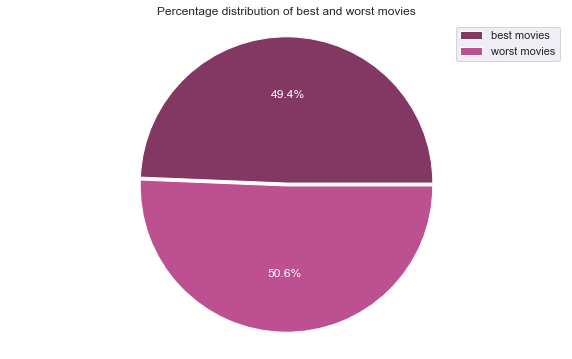

In [21]:
plt.figure(figsize=(10,6))
explode = (0.01,0.01)
plt.pie([len(dataset_best),len(dataset_worst)], colors=colors, labels=['best movies','worst movies'],autopct='%.1f%%', textprops={'color':"w"}, explode = explode)
plt.legend(loc='upper right')
plt.axis('equal')
plt.title("Percentage distribution of best and worst movies")
plt.show()

## Visualization of top 10 tokens in worst movies

Display top 10 tokens
['stori', 'take', 'young', 'love', 'year', 'life', 'live', 'find', 'world', 'famili']


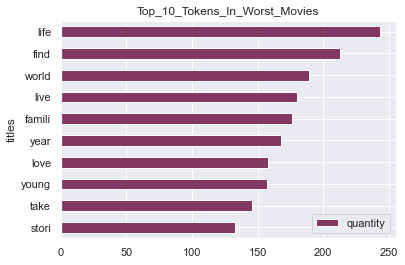

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  0 | stori    |        133 |
|  1 | take     |        146 |
|  2 | young    |        157 |
|  3 | love     |        158 |
|  4 | year     |        168 |
|  9 | famili   |        176 |
|  6 | live     |        180 |
|  8 | world    |        189 |
|  7 | find     |        213 |
|  5 | life     |        243 |
+----+----------+------------+
['stori', 'love', 'take', 'famili', 'young', 'live', 'world', 'find', 'year', 'life']


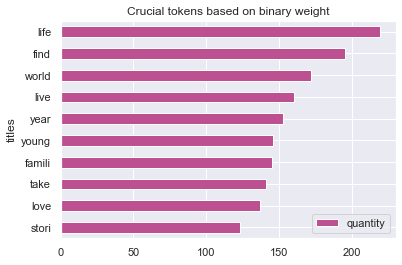

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  0 | stori    |        123 |
|  1 | love     |        137 |
|  2 | take     |        141 |
|  3 | famili   |        145 |
|  4 | young    |        146 |
|  8 | year     |        153 |
|  5 | live     |        160 |
|  6 | world    |        172 |
|  7 | find     |        195 |
|  9 | life     |        219 |
+----+----------+------------+
Display top 10 most important tokens
['take', 'stori', 'love', 'world', 'famili', 'find', 'year', 'young', 'live', 'life']


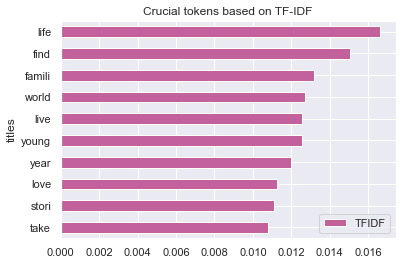

+----+----------+-----------+
|    | titles   |     TFIDF |
|----+----------+-----------|
|  0 | take     | 0.0107681 |
|  1 | stori    | 0.0110806 |
|  2 | love     | 0.0112383 |
|  6 | year     | 0.0119697 |
|  7 | young    | 0.0125297 |
|  8 | live     | 0.012541  |
|  3 | world    | 0.012718  |
|  4 | famili   | 0.0131983 |
|  5 | find     | 0.0150257 |
|  9 | life     | 0.0165857 |
+----+----------+-----------+


In [22]:
Top10_OneSet(sample_worst,"Top_10_Tokens_In_Worst_Movies","Top_10_Worst_Tokens")
Binary_weight(sample_worst)
TF_IDF(sample_worst)

## Visualization of top10 tokens only in Best movies

Display top 10 tokens


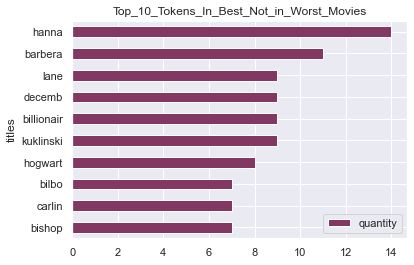

+----+------------+------------+
|    | titles     |   quantity |
|----+------------+------------|
|  0 | bishop     |          7 |
|  1 | carlin     |          7 |
|  8 | bilbo      |          7 |
|  5 | hogwart    |          8 |
|  2 | kuklinski  |          9 |
|  4 | billionair |          9 |
|  6 | decemb     |          9 |
|  9 | lane       |          9 |
|  3 | barbera    |         11 |
|  7 | hanna      |         14 |
+----+------------+------------+


In [23]:
Top10onlyInA(sample_best,sample_worst,"Top_10_Tokens_In_Best_Not_in_Worst_Movies","Top_10_Best_Minus_Worst_Tokens")

## Visualization of top10 tokens only in worst movies

Display top 10 tokens


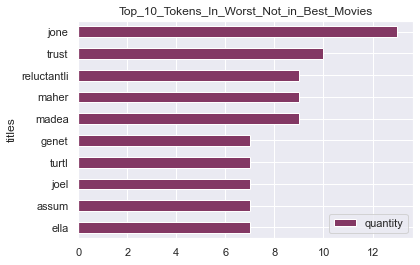

+----+-------------+------------+
|    | titles      |   quantity |
|----+-------------+------------|
|  0 | ella        |          7 |
|  1 | assum       |          7 |
|  2 | joel        |          7 |
|  3 | turtl       |          7 |
|  7 | genet       |          7 |
|  5 | madea       |          9 |
|  8 | maher       |          9 |
|  9 | reluctantli |          9 |
|  4 | trust       |         10 |
|  6 | jone        |         13 |
+----+-------------+------------+


In [24]:
Top10onlyInA(sample_worst,sample_best,"Top_10_Tokens_In_Worst_Not_in_Best_Movies","Top_10_Worst_Minus_Best_Tokens")

## Classifications

In [25]:
dataset_vector, dataset_titles_1 = vectorizing(dataset_titles['description'])

### Dividing into training and testing set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dataset_titles['description'], dataset_titles['Best'], test_size=0.33,
                                                    random_state=42)

X_train_vector, X_train_titles = vectorizing_voc(X_train, dataset_titles_1)
X_test_vector, X_test_titles = vectorizing_voc(X_test, dataset_titles_1)

### Decision Tree Classifier

Accuracy and heatmap representing the classification

Accuracy DTC: 0.5335335335335335


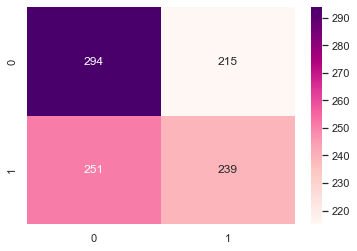

In [27]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_vector, y_train)
y_pred = DTC.predict(X_test_vector)
print("Accuracy DTC:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", DTC.score(X_test_vector, y_test))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")
#Suma w wierszu to test, suma w kolumnie to pred

In [28]:
print(f'DTC model \n {classification_report(y_test, y_pred)}')

DTC model 
               precision    recall  f1-score   support

       False       0.54      0.58      0.56       509
        True       0.53      0.49      0.51       490

    accuracy                           0.53       999
   macro avg       0.53      0.53      0.53       999
weighted avg       0.53      0.53      0.53       999



### K-Neighbors Classifier

Accuracy and heatmap

Accuracy KNN: 0.5165165165165165


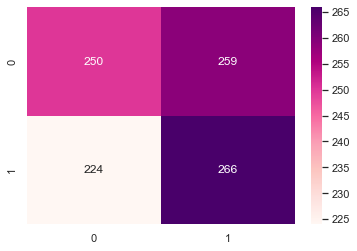

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_vector, y_train)
y_pred = classifier.predict(X_test_vector)

print("Accuracy KNN:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", classifier.score(X_test_vector, y_test))

ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")

In [30]:
print(f'KNN model \n {classification_report(y_test, y_pred)}')

KNN model 
               precision    recall  f1-score   support

       False       0.53      0.49      0.51       509
        True       0.51      0.54      0.52       490

    accuracy                           0.52       999
   macro avg       0.52      0.52      0.52       999
weighted avg       0.52      0.52      0.52       999



### Neural network Classfier

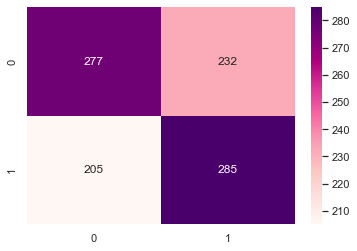

In [31]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train_vector, y_train)
y_pred=NN.predict(X_test_vector)
round(NN.score(X_test_vector,y_test), 4)
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")

In [32]:
print(f'NN model \n {classification_report(y_test, y_pred)}')

NN model 
               precision    recall  f1-score   support

       False       0.57      0.54      0.56       509
        True       0.55      0.58      0.57       490

    accuracy                           0.56       999
   macro avg       0.56      0.56      0.56       999
weighted avg       0.56      0.56      0.56       999



### Random Forest Classifier

Accuracy RFC: 0.5585585585585585


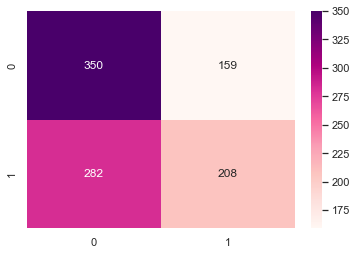

In [33]:
RFC = RandomForestClassifier()
RFC.fit(X_train_vector, y_train)
y_pred = RFC.predict(X_test_vector)
print("Accuracy RFC:", metrics.accuracy_score(y_test, y_pred))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")

In [34]:
print(f'RFC model \n {classification_report(y_test, y_pred)}')

RFC model 
               precision    recall  f1-score   support

       False       0.55      0.69      0.61       509
        True       0.57      0.42      0.49       490

    accuracy                           0.56       999
   macro avg       0.56      0.56      0.55       999
weighted avg       0.56      0.56      0.55       999



### AdaBoost Classifier

Accuracy ABC: 0.5425425425425425


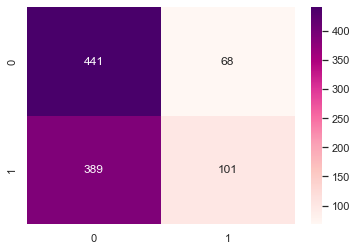

In [35]:
ABC = AdaBoostClassifier()
ABC.fit(X_train_vector, y_train)
y_pred = ABC.predict(X_test_vector)
print("Accuracy ABC:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", ABC.score(X_test_vector, y_test))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")

In [36]:
print(f'AdaBoost model \n {classification_report(y_test, y_pred)}')

AdaBoost model 
               precision    recall  f1-score   support

       False       0.53      0.87      0.66       509
        True       0.60      0.21      0.31       490

    accuracy                           0.54       999
   macro avg       0.56      0.54      0.48       999
weighted avg       0.56      0.54      0.49       999



### Bagging Classifier

Accuracy BC: 0.5605605605605606


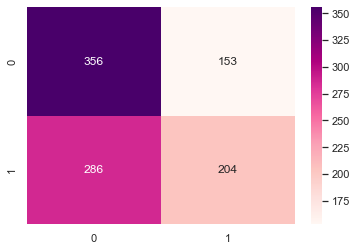

In [37]:
BC = BaggingClassifier()
BC.fit(X_train_vector, y_train)
y_pred = BC.predict(X_test_vector)
print("Accuracy BC:", metrics.accuracy_score(y_test, y_pred))
#print("Accuracy another way:", BC.score(X_test_vector, y_test))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),cmap="RdPu",annot=True,fmt="d")

In [38]:
print(f'AdaBoost BC \n {classification_report(y_test, y_pred)}')

AdaBoost BC 
               precision    recall  f1-score   support

       False       0.55      0.70      0.62       509
        True       0.57      0.42      0.48       490

    accuracy                           0.56       999
   macro avg       0.56      0.56      0.55       999
weighted avg       0.56      0.56      0.55       999



## Create wordcloud

### Wordcloud for all tokens in dataset movies

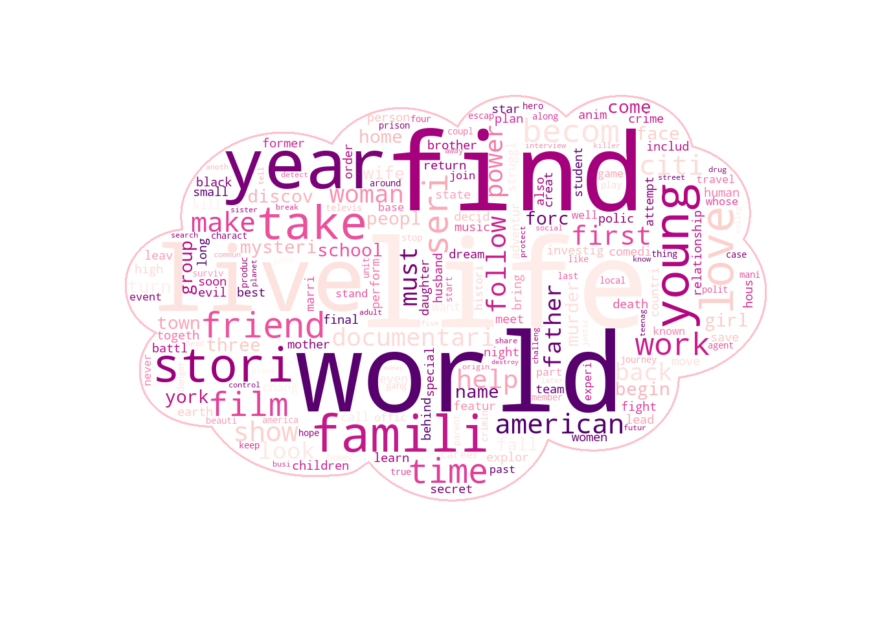

In [39]:
tokens_to_wordcloud = []
for a in dataset_titles.description:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

mask = np.array(Image.open("mask1.png"))
wordcloud = WordCloud(colormap='RdPu', background_color="white", mask=mask, contour_width=3, contour_color='pink').generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

### Wordcloud for best movies in dataset

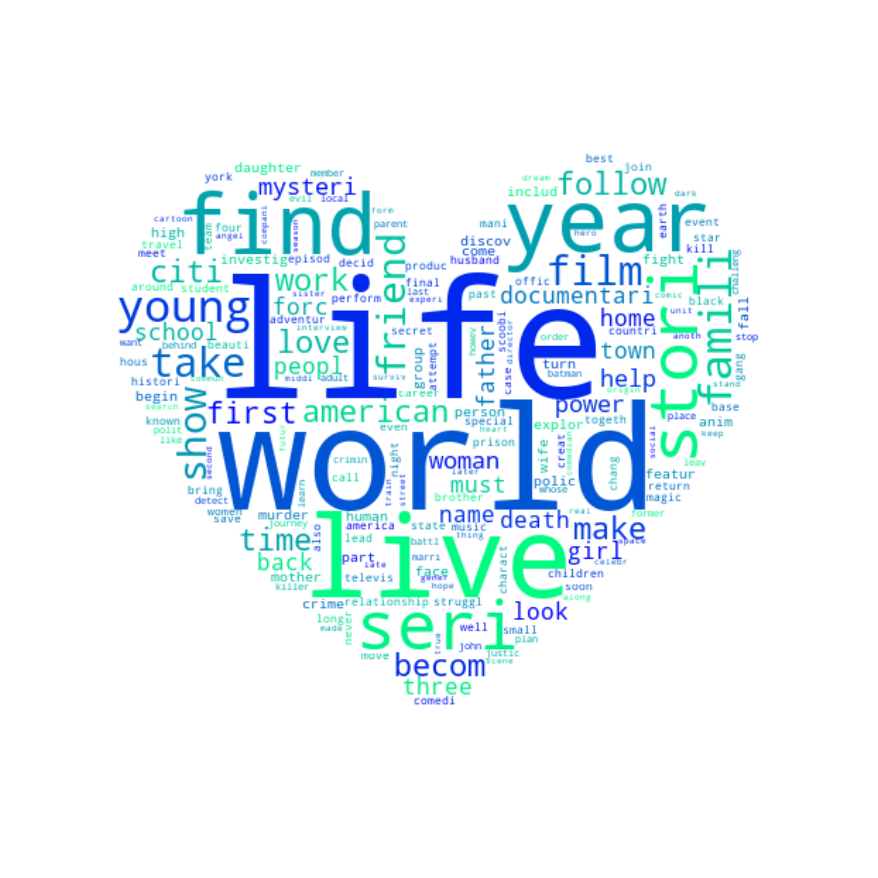

In [40]:
tokens_to_wordcloud = []
for a in dataset_best.description:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

mask = np.array(Image.open("maskHeart.jpg"))
wordcloud = WordCloud(colormap='winter', background_color="white", mask=mask).generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()

### Wordcloud for best movies in dataset

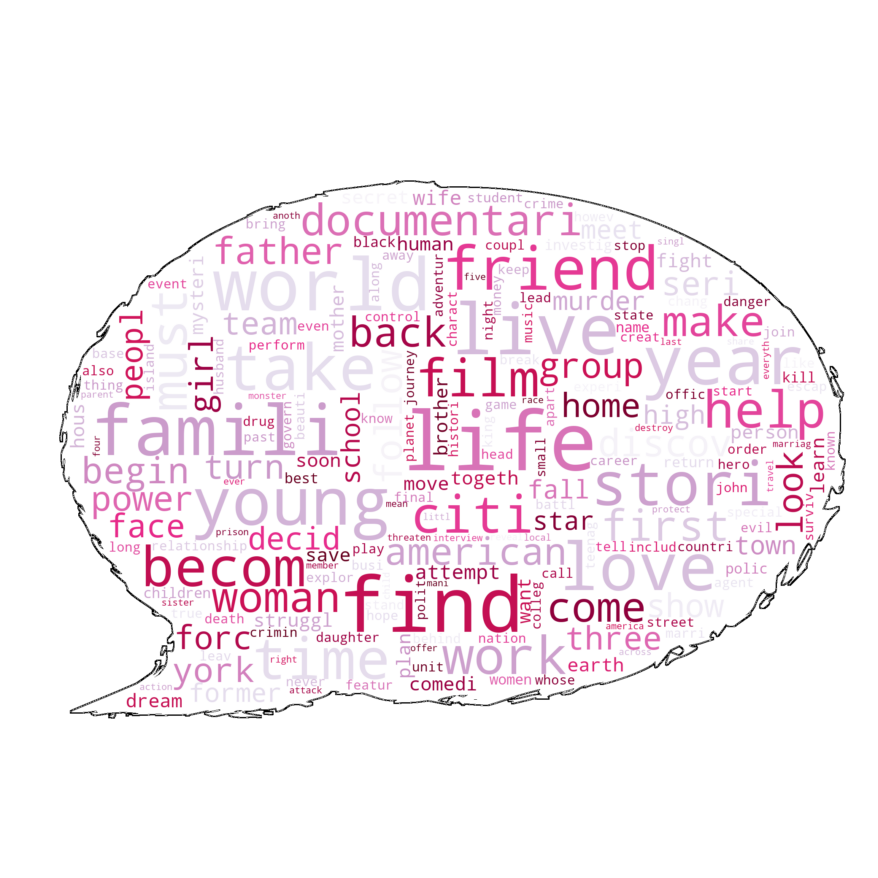

In [41]:
tokens_to_wordcloud = []
for a in dataset_worst.description:
    tokens_to_wordcloud+=text_tokenizer(a)
bow_txt=create_bow(tokens_to_wordcloud)

mask = np.array(Image.open("mask2.png"))
wordcloud = WordCloud(colormap='PuRd', background_color="white", mask=mask, contour_width=1, contour_color='black').generate_from_frequencies(bow_txt)
plt.figure(figsize=(12, 20), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig("wordcloud_project.jpg")
plt.show()